<a href="https://colab.research.google.com/github/CarlosSeverian/Intro_Ciencia_Dados_2021/blob/main/ICD_Trabalho_1_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Introdução a Ciência de Dados
Prof. Tiago Sanches da Silva
# **OLIST**
<br><br>
Junho/2021 <br>

**Carlos Roberto Severian de Carvalho**<br>
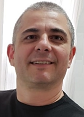<br>
20.84225-2@maua.br <br>

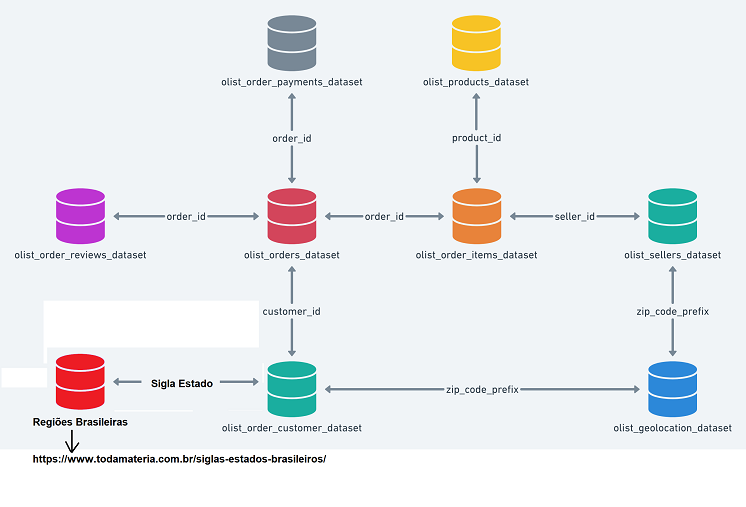

## Para a análise neste notebook será utilizada a página<br>
### **Por Região** do Power BI para aprofundarmos o entendimento dos valores transacionados nas regiões, estados e cidades brasileiras

#Importando Bibliotecas

In [ ]:
!pip install gitly

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('github')

# Carregando arquivos CSV

In [ ]:
# Os arquivos estão depositados em minha conta do MEGA.nz
!apt-get install megatools   # instalando ferramenta do MEGA.nz
!megadl 'https://mega.nz/#!ghFlUahR!8ehcFMdEVpo3DFBZ0pM0AbFySEw2bEMr-USUF9jit6w'  # Download do arquivo compactado
!unrar x 'OLIST.rar'  # Descompactando

In [5]:
# Leitura dos dados
caminho = '/content/'
df_customers      = pd.read_csv(caminho+"olist_customers_dataset.csv")
df_geo            = pd.read_csv(caminho+"olist_geolocation_dataset.csv", encoding='utf8')
df_order_items    = pd.read_csv(caminho+"olist_order_items_dataset.csv")
df_order_pay      = pd.read_csv(caminho+"olist_order_payments_dataset.csv")
df_reviews        = pd.read_csv(caminho+"olist_order_reviews_dataset.csv")
df_order          = pd.read_csv(caminho+"olist_orders_dataset.csv")
df_products       = pd.read_csv(caminho+"olist_products_dataset.csv")
df_sellers        = pd.read_csv(caminho+"olist_sellers_dataset.csv")
df_translation    = pd.read_csv(caminho+"product_category_name_translation.csv")
### O dataset regiões foi incoporado a análise. Extraido do site
### https://www.todamateria.com.br/siglas-estados-brasileiros/
### e organizado no Excel
df_regioes        = pd.read_csv(caminho+"Regioes Brasileiras.csv", sep=';', encoding='cp1252')

## Pré Análise


In [6]:
df_order['order_status'].value_counts()
# identificamos Pedidos cancelados e indisponíveis

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [7]:
# Identificar quanto esses status impactam nos valores transacionados

# incorporando o campo order_status nos pagamentos
df_order_pay = df_order_pay.merge(df_order[['order_id', 'order_status']])

# verificando o resultado
df_temp = df_order_pay[['order_status', 'payment_value']].groupby(by='order_status', as_index=False).sum()
df_temp['perc %'] = np.round(df_temp['payment_value']/df_temp['payment_value'].sum()*100,decimals=2)
df_temp['Valor por mil'] = np.round(df_temp['payment_value']/1000,decimals=2)
df_temp[['order_status', 'Valor por mil', 'perc %']].sort_values(by='Valor por mil', ascending=False)

,order_status,Valor por mil,perc %
3,delivered,15422.46,96.34
6,shipped,177.21,1.11
1,canceled,143.26,0.89
7,unavailable,126.48,0.79
5,processing,69.39,0.43
4,invoiced,69.14,0.43
2,created,0.69,0.00
0,approved,0.24,0.00


In [8]:
# Eliminando os pagamentos cancelados (0,89%) e em situação indisponível (0,79%).
# Os demais status sugerem que as transações foram efetuadas com sucesso
df_order_pay = df_order_pay[df_order_pay['order_status'] != 'canceled']
df_order_pay = df_order_pay[df_order_pay['order_status'] != 'unavailable']

# verificando
df_temp = df_order_pay[['order_status', 'payment_value']].groupby(by='order_status', as_index=False).sum()
df_temp['perc %'] = np.round(df_temp['payment_value']/df_temp['payment_value'].sum()*100,decimals=2)
df_temp['Valor por mil'] = np.round(df_temp['payment_value']/1000,decimals=2)
df_temp[['order_status', 'Valor por mil', 'perc %']].sort_values(by='Valor por mil', ascending=False)

,order_status,Valor por mil,perc %
2,delivered,15422.46,97.99
5,shipped,177.21,1.13
4,processing,69.39,0.44
3,invoiced,69.14,0.44
1,created,0.69,0.00
0,approved,0.24,0.00


# Análise da página **Por Região**

### **Reproduzindo os cartões adicionados no PowerBI**
1) Quantidade de categorias transacionadas<br>
2) Quantidade de produtos transacionados<br>
3) Quantidade de produtos ÚNICOS transacionados<br>
4) Total de vendas em estudo

1) Quantidade de categorias transacionadas

In [9]:
# Quantidade de categorias transacionadas
# Como temos alguns registros nulos nessa coluna, vamos preencher como Não Informado
df_products['product_category_name'] = df_products['product_category_name'].fillna('Não Informado')
print('Qtde de Categoria ÚNICAS Transacionadas:',df_products['product_category_name'].nunique())


Qtde de Categoria ÚNICAS Transacionadas: 74


2) Quantidade de produtos transacionados

In [10]:
# Quantidade de Produtos transacionadas
# É necessário retirar os Itens de Pedidos cancelados e indisponíveis

# incorporando o campo order_status nos itens
df_order_items = df_order_items.merge(df_order[['order_id', 'order_status']])
# Removendo os cancelados e indisponíveis
df_order_items = df_order_items[df_order_items['order_status'] != 'canceled']
df_order_items = df_order_items[df_order_items['order_status'] != 'unavailable']

print(f'Qtde de Produtos Transacionadas: {df_order_items["product_id"].count():,}')

Qtde de Produtos Transacionadas: 112,101


3) Quantidade de produtos ÚNICOS transacionados

In [11]:
# Quantidade de Produtos ÚNICOS transacionadas
# os cancelados e indispoíveis já foram removidos anteriormente
print(f'Qtde de Produtos ÚNICOS Transacionadas: {df_order_items["product_id"].nunique():,}')

Qtde de Produtos ÚNICOS Transacionadas: 32,729


4) Total de vendas em estudo

In [12]:
# Valor Vendido
# os cancelados e indispoíveis já foram removidos anteriormente
print(f'Valor Vendido: R$ {df_order_pay["payment_value"].sum():,.2f}')

Valor Vendido: R$ 15,739,137.01


### **Reproduzindo as tabelas adicionadas no PowerBI**
5) Tabela de Valores por Categorias (ordenada por valores)<br>
6) Total de Valores por Estado e Cidade (ordenada por valores)

In [13]:
# Tabela de Valores por Categorias (ordenada por valores)
# Criando dataframe com os pagamentos por pedido
# a seguencia abaixo é necessária para criarmos totalizadores de Valores Pagos por Categorias de Produtos
df_order_pay['chave'] = df_order_pay.index 
df_temp = df_order.merge(df_order_pay[['order_id','payment_value', 'chave']], how='left')
df_temp = df_temp.merge(df_order_items[['order_id','product_id']], how='left')
df_temp = df_temp.drop_duplicates(subset=['order_id', 'chave'], keep='first')
df_temp = df_temp.merge(df_products[['product_id', 'product_category_name']], how='left')
df_temp = df_temp[['product_category_name', 'payment_value']]
df_temp['product_category_name'] = df_temp['product_category_name'].fillna('Não Informado')
df_temp['payment_value'] = df_temp['payment_value'].fillna(0)

df_temp = df_temp.groupby(by='product_category_name',as_index=False).sum().sort_values(by='payment_value', ascending=False)
df_temp['Perc %'] = np.round(df_temp['payment_value']/df_temp['payment_value'].sum()*100,decimals=2)
df_temp = df_temp.reset_index(drop=True)

# O df_temp tem os valores pagos, ordenados por Categoria de Produtos

# Conferindo se o Valor Total Original de pagamentos está igual ao valor do resultado df_temp
print(f'Valor Vendido - df_order_pay ..: R$ {df_order_pay["payment_value"].sum():,.2f}')
print(f'Valor Vendido - df_temp .......: R$ {df_temp["payment_value"].sum():,.2f}')

Valor Vendido - df_order_pay ..: R$ 15,739,137.01
Valor Vendido - df_temp .......: R$ 15,739,137.01


5) Tabela de Valores por Categorias (ordenada por valores)

In [14]:
# Exibindo a tabela semelhante a tabela do PowerBI
df_temp.columns = ['Categoria', 'Valor Vendido', 'Perc %']
df_temp

,Categoria,Valor Vendido,Perc %
0,beleza_saude,1436423.96,9.13
1,relogios_presentes,1295910.38,8.23
2,cama_mesa_banho,1239634.65,7.88
3,esporte_lazer,1148342.48,7.30
4,informatica_acessorios,1049299.28,6.67
...,...,...,...
69,pc_gamer,1280.07,0.01
70,casa_conforto_2,1131.41,0.01
71,cds_dvds_musicais,954.99,0.01
72,fashion_roupa_infanto_juvenil,785.67,0.00


In [15]:
#Total de Valores por Estado e Cidade (ordenada por valores)
# Criando dataframe com os pagamentos por pedido
# a seguencia abaixo é necessária para criarmos totalizadores de Valores Pagos por Estado e Cidade
df_temp = df_order.merge(df_order_pay[['order_id','payment_value']], how='left')
df_temp = df_temp.merge(df_customers[['customer_id','customer_city', 'customer_state']])
df_temp = df_temp[['customer_state', 'customer_city', 'payment_value']]
df_temp = df_temp.groupby(by=['customer_state', 'customer_city'],as_index=False).sum().sort_values(by='payment_value', ascending=False)
df_temp['Perc %'] = np.round(df_temp['payment_value']/df_temp['payment_value'].sum()*100,decimals=2)
df_temp = df_temp.reset_index(drop=True)


6) Total de Valores por Estado e Cidade (ordenada por valores)

In [16]:
df_temp.columns = ['UF', 'Cidade', 'Valor Vendido', 'Perc %']
df_temp

,UF,Cidade,Valor Vendido,Perc %
0,SP,sao paulo,2150534.77,13.66
1,RJ,rio de janeiro,1147675.81,7.29
2,MG,belo horizonte,411571.58,2.61
3,DF,brasilia,350563.33,2.23
4,PR,curitiba,240889.56,1.53
...,...,...,...,...
4305,SP,monteiro lobato,0.00,0.00
4306,PR,jataizinho,0.00,0.00
4307,MG,palmital de minas,0.00,0.00
4308,SC,alto bela vista,0.00,0.00


### **Reproduzindo o Gráfico de Barras adicionado no PowerBI**
7) Total de Valores por Região (Nível 1)<br>
8) Total de Valores por Estado (Nível 2)<br>
9) Total de Valores por Cidade (Nível 3)

In [17]:
# Agregando a Região ao último df_temp (com os dados de pagamento, cidade e estado) criado
df_temp = df_temp.merge(df_regioes, left_on='UF', right_on='Sigla')

7) Total de Valores por Região (Nível 1)

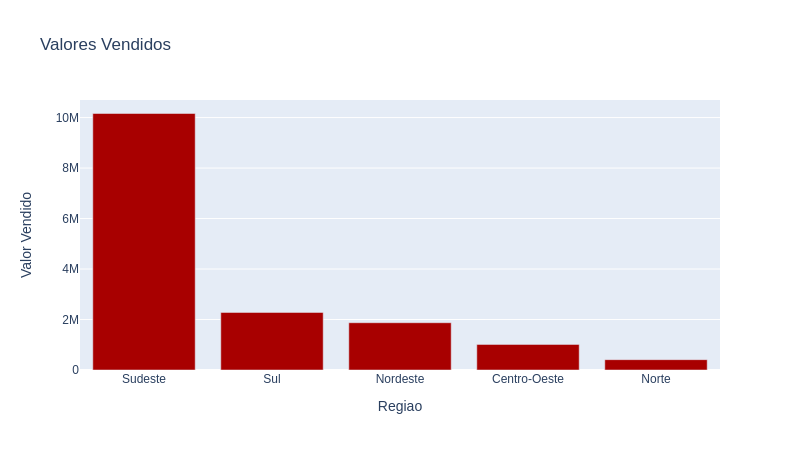

In [18]:
df_grafico = df_temp.groupby('Regiao', as_index=False).sum()
fig = px.bar(df_grafico, x='Regiao', y='Valor Vendido',  title='Valores Vendidos')
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(marker_color='#A80000')
gitly.show( fig )

8) Total de Valores por Estado (Nível 2)

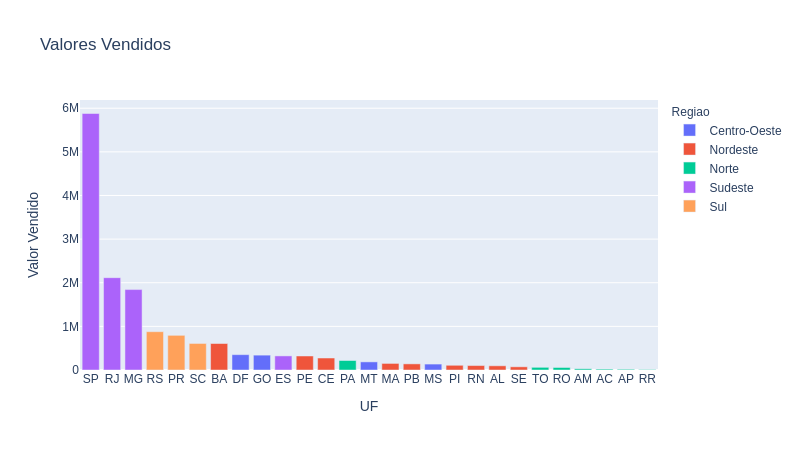

In [19]:
df_grafico = df_temp.groupby(by=['Regiao','UF'], as_index=False).sum()
fig = px.bar(df_grafico, x='UF', y='Valor Vendido',  title='Valores Vendidos', color='Regiao')
fig.update_xaxes(categoryorder='total descending')
gitly.show( fig )

9) Total de Valores por Cidade (Nível 3)

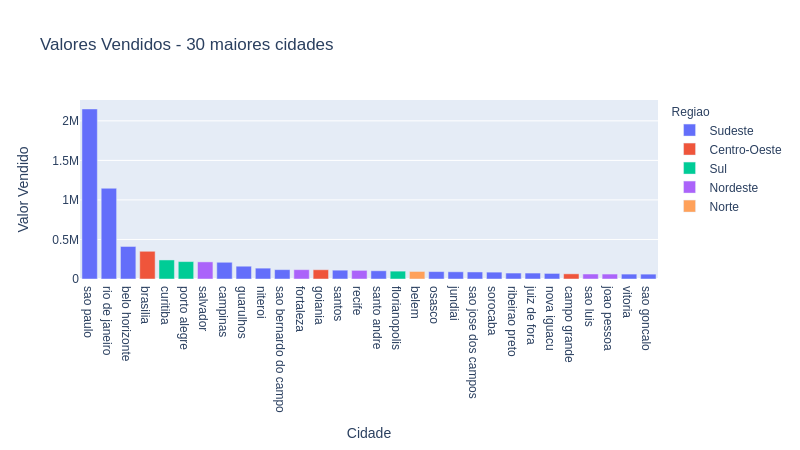

In [20]:
# Para esse gráfico, como temos muitas cidades, vamos mostrar apenas as 30 maiores
df_grafico = df_temp.groupby(by=['Regiao','Cidade'], as_index=False).sum().sort_values(by = 'Valor Vendido', ascending=False)
df_grafico = df_grafico[0:30]
fig = px.bar(df_grafico, x='Cidade', y='Valor Vendido',  title='Valores Vendidos - 30 maiores cidades', color='Regiao')
fig.update_xaxes(categoryorder='total descending')
gitly.show( fig )

# Conclusão

#####Comparação entre a análise descritiva utilizando o PowerBI e o Python/Pandas

- Considerando que o conjunto de dados OLIST não é muito grande, e ainda, é um conjunto de datasets muito "bem comportado" é muito intuitivo utilizar o PowerBI para a construção das análises, pois os relacionamentos entre os datasets, administrados pelo PowerBI permitem utilizar os campos de vários datasets nas visualizações, sem a necessidade de se fazer merges entre eles.

- Para esse conjunto de dados, o tratamento necessário é mínimo, facilitando o trabalho no PowerBI que, mesmo com um conjunto poderoso de ferramentas para essa etapa, pode não conseguir resolver problemas mais complexos, que seriam facilmente resolvidos no ambiente Python/Pandas.

- O PowerBI é uma ferramenta visual, e conta com o recurso muito poderoso de interação entre os objetos, que permite aos usuários menos especializados e para os executivos das empresas fazerem suas próprias análises a partir de construções preparadas, como foi o caso desse trabalho.

- O Ambiente Python/Pandas é com certeza um ambiente menos visual mais muito mais poderoso, especialmente para o tratamento de dados e, mesmo para a construção de gráficos, conta com customizações muito poderosas, impossíveis de se obter no PowerBI.

- Finalmente, saber utilizar ambas as ferramentas, abre infinitas opções para a resolução de probemas específicos para cada situação, com a opção de utilizá-las simultaneamente, de acordo com cada necessidade.